In [1]:
from PPO_train_test import PPOTrainer
import numpy as np
import pandas as pd
from datetime import datetime

In [ ]:
trainer = PPOTrainer(train_domain = "source",
        test_domain = "target",
        use_udr = False,             # use UDR Uniform Domain Randomization
        seed = 42,
        total_timesteps = 200000,  # training timesteps
        model_path = "models/ppo_hopper",  # path to save the model
        learning_rate=1e-3, 
        n_steps=4096,               # number of steps to run for each environment per update
        batch_size=256,             # minibatch size
        n_epochs=15,                # number of epochs to update the policy
        verbose=0,                  # verbosity level: 0 for no output, 1 for training info
        n_eval_episodes=50)         # number of episodes to evaluate the policy


# train + test the model 
(mean, std), time = trainer.run()

# only train 
# trainer.train()

# only test
# trainer.evaluate()

 Training completed and model saved.

Mean reward on CustomHopper-target-v0: 778.26 ± 36.48


In [2]:
seeds = [42, 35, 254, 78, 91]
l_rates = [1e-3, 3e-4]
n_steps = [2048, 4096]
batch_sz = [64, 256]
n_epochs = [10, 15]

In [3]:
means = []
stds = []
times = []
for lr in l_rates:
    mean_ns = []
    std_ns = []
    time_ns = []
    for ns in n_steps:
        mean_bs = []
        std_bs = []
        time_bs = []
        for bs in batch_sz:
            mean_ne = []
            std_ne = []
            time_ne = []
            for ne in n_epochs:
                mean_s=0
                std_s=0
                time_s=0
                for i,s in enumerate(seeds):
                    model_name = f'PPO_lr{lr}_ns{ns}_bs{bs}_ne{ne}_s{s}_'+datetime.now().strftime('%y%m%d_%H-%M-%S')
                    trainer = PPOTrainer(train_domain = "source",
                        test_domain = "source",
                        use_udr = True,             # use UDR Uniform Domain Randomization
                        seed = s,
                        total_timesteps = 200000,  # training timesteps
                        model_path = "models/"+model_name,  # path to save the model
                        learning_rate=lr, 
                        n_steps=ns,               # number of steps to run for each environment per update
                        batch_size=bs,             # minibatch size
                        n_epochs=ne,                # number of epochs to update the policy
                        verbose=0,                  # verbosity level: 0 for no output, 1 for training info
                        tensorboard_log='models/'+model_name+'_tensorboard',
                        n_eval_episodes=50)         # number of episodes to evaluate the policy
                    (mean, std), train_time = trainer.run()
                    mean_s = mean_s*(i/(i+1))+mean/(i+1)
                    std_s = std_s*(i/(i+1))+std/(i+1)
                    time_s = time_s*(i/(i+1))+train_time/(i+1)
                mean_ne.append(mean_s)
                std_ne.append(std_s)
                time_ne.append(time_s)
            mean_bs.append(mean_ne)
            std_bs.append(std_ne)
            time_bs.append(time_ne)
        mean_ns.append(mean_bs)
        std_ns.append(std_bs)
        time_ns.append(time_bs)
    means.append(mean_ns)
    stds.append(std_ns)
    times.append(time_ns)

means_array_dr = np.array(means)
stds_array_dr = np.array(stds)
times_array_dr = np.array(times)

TypeError: __init__() got an unexpected keyword argument 'tensorboard_log'

In [64]:
seeds = [254, 78, 91]
l_rates = [1e-3, 3e-4]
n_steps = [2048, 4096]
batch_sz = [64, 256]
n_epochs = [10, 15]

In [65]:
means = []
stds = []
times = []
for lr in l_rates:
    mean_ns = []
    std_ns = []
    time_ns = []
    for ns in n_steps:
        mean_bs = []
        std_bs = []
        time_bs = []
        for bs in batch_sz:
            mean_ne = []
            std_ne = []
            time_ne = []
            for ne in n_epochs:
                mean_s=0
                std_s=0
                time_s=0
                for i,s in enumerate(seeds):
                    trainer = PPOTrainer(train_domain = "source",
                        test_domain = "target",
                        use_udr = False,             # use UDR Uniform Domain Randomization
                        seed = s,
                        total_timesteps = 200000,  # training timesteps
                        model_path = "models/ppo_hopper",  # path to save the model
                        learning_rate=lr, 
                        n_steps=ns,               # number of steps to run for each environment per update
                        batch_size=bs,             # minibatch size
                        n_epochs=ne,                # number of epochs to update the policy
                        verbose=0,                  # verbosity level: 0 for no output, 1 for training info
                        n_eval_episodes=50)         # number of episodes to evaluate the policy
                    (mean, std), train_time = trainer.run()
                    mean_s = mean_s*(i/(i+1))+mean/(i+1)
                    std_s = std_s*(i/(i+1))+std/(i+1)
                    time_s = time_s*(i/(i+1))+train_time/(i+1)
                mean_ne.append(mean_s)
                std_ne.append(std_s)
                time_ne.append(time_s)
            mean_bs.append(mean_ne)
            std_bs.append(std_ne)
            time_bs.append(time_ne)
        mean_ns.append(mean_bs)
        std_ns.append(std_bs)
        time_ns.append(time_bs)
    means.append(mean_ns)
    stds.append(std_ns)
    times.append(time_ns)

means_array2 = np.array(means)
stds_array2 = np.array(stds)
times_array2 = np.array(times)

 Training completed and model saved.

Mean reward on CustomHopper-target-v0: 1150.67 ± 41.03
 Training completed and model saved.

Mean reward on CustomHopper-target-v0: 1016.61 ± 59.83
 Training completed and model saved.

Mean reward on CustomHopper-target-v0: 1120.35 ± 148.39
 Training completed and model saved.

Mean reward on CustomHopper-target-v0: 706.76 ± 9.59
 Training completed and model saved.

Mean reward on CustomHopper-target-v0: 862.72 ± 56.10
 Training completed and model saved.

Mean reward on CustomHopper-target-v0: 881.99 ± 21.39
 Training completed and model saved.

Mean reward on CustomHopper-target-v0: 951.23 ± 9.40
 Training completed and model saved.

Mean reward on CustomHopper-target-v0: 1011.44 ± 43.65
 Training completed and model saved.

Mean reward on CustomHopper-target-v0: 571.62 ± 13.72
 Training completed and model saved.

Mean reward on CustomHopper-target-v0: 1041.45 ± 211.53
 Training completed and model saved.

Mean reward on CustomHopper-target-v0

In [66]:
print(means_array2)
print(stds_array2)
print(times_array2)

[[[[1095.87921329  817.1552046 ]
   [ 844.76017857  992.74918681]]

  [[ 704.79363833  831.81645136]
   [1140.93147975 1341.98531537]]]


 [[[1160.23394179  964.19110044]
   [ 493.90939145  651.3566999 ]]

  [[1178.98083437 1111.87159089]
   [ 640.73314809  526.05275552]]]]
[[[[ 83.0820173   29.02661895]
   [ 22.25606173 171.04224587]]

  [[  8.83314483  11.04926055]
   [ 83.91326319  54.29932024]]]


 [[[115.52177968  29.39034034]
   [ 44.3917589  128.70224987]]

  [[102.75243505  34.24218832]
   [ 28.59238167  10.38585005]]]]
[[[[135.43522334 179.19484933]
   [ 97.92555388 112.70184914]]

  [[144.94195414 187.49188677]
   [ 96.48126268 112.74950012]]]


 [[[146.64692259 191.53141348]
   [118.04604157 132.98107131]]

  [[168.14606134 209.88483055]
   [106.81963642 120.73227501]]]]


In [67]:
means_array[0,1]

array([[1094.70346412,  844.05498045],
       [ 997.76133491, 1181.29636852]])

In [91]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# Creazione di una sottomappa di viridis, in modo da avere il verde come massimo
viridis = matplotlib.colormaps['viridis'].resampled(280)
newcolors = viridis(np.linspace(0, 1, 280))[:210]
newcmp=matplotlib.colors.ListedColormap(newcolors)

In [92]:
def heatMapGridSearch(modelResults): #, gridDict, scoreInterest):  # mean_test_score, mean_train_score, mean_fit_time
    #vmin=modelResults[scoreInterest].min()
    #vmax=1
    fig,axs=plt.subplots(1,1,figsize=(5,4))
    square=pd.DataFrame()   
    for lr in range(len(l_rates)):
        col=pd.DataFrame()
        for ns in range(len(n_steps)):
            df = pd.DataFrame(modelResults[lr,ns])
            col=pd.concat([col,df])
        square=pd.concat([square,col], axis=1)
        
    """
    col=pd.DataFrame()
    for alp in gridDict['alpha']:
        df = modelResults[modelResults['param_batch_size']==bs][modelResults['param_activation']==act][modelResults['param_alpha']==alp][modelResults['param_learning_rate']=='constant']
        df=df.pivot(index='layers', columns='layerSize', values=scoreInterest)
        col=pd.concat([col,df])
    square=pd.concat([square,col], axis=1)
    """
    batch_sz = [64, 256, 64, 256]
    n_epochs = [10, 15, 10, 15]
    im=axs.imshow(square.astype(float),cmap=newcmp) #vmin=vmin,vmax=vmax,
    axs.set_yticks(range(len(square.index)))
    axs.set_yticklabels(batch_sz)
    axs.set_xticks(range(len(square.columns)))
    axs.set_xticklabels(n_epochs)
    #ax.title.set_text(bs)
    axs.set_xlabel("num. epochs")
    axs.set_ylabel("batch size")
    for a in range(len(square.index)):
        for j in range(len(square.columns)):
            c="w"
            if square.iloc[a, j]==square.values.max():
                c="red"
            text = axs.text(j, a, "{0:.2f}".format(square.iloc[a, j]),
                        ha="center", va="center", color=c)
    #Linee verticali e orizzontali di separazione
    axs.axhline(y=1.5,c="black",linewidth=0.75,zorder=0)
    axs.axvline(x=1.5,c="black",linewidth=0.75,zorder=0)
    #Testi aggiuntivi degli assi mancanti e titolo
    #axs.text(1.5, -1, 'batchSize = '+str(bs), ha="center", va="center", fontsize=12) n_steps = [2048, 4096]
    axs.text(4, 1.5, 'num. steps', ha="center", va="center", rotation='vertical')
    axs.text(1.5, -1, 'learning rate', ha="center", va="center")
    axs.text(0.5, -0.7, '1e-3', ha="center", va="center")
    axs.text(2.5, -0.7, '3e-4', ha="center", va="center")
    axs.text(3.75, 0.5, '2048', ha="left", va="center")
    axs.text(3.75, 2.5, '4096', ha="left", va="center")

    cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    #plt.savefig('PPO_times',dpi=300)
    plt.show()
    #print('MIGLIORI IPERPARAMETRI')
    #max_elem_row=modelResults[scoreInterest].astype(float).idxmax()
    #bestModel = modelResults.iloc[max_elem_row]
    #bestModelShort = bestModel[[idx for idx in bestModel.index if 'param' in idx and 'params' not in idx]+['mean_train_score','mean_test_score','mean_fit_time']]
    #display(pd.DataFrame(bestModelShort).transpose())
    #return bestModel

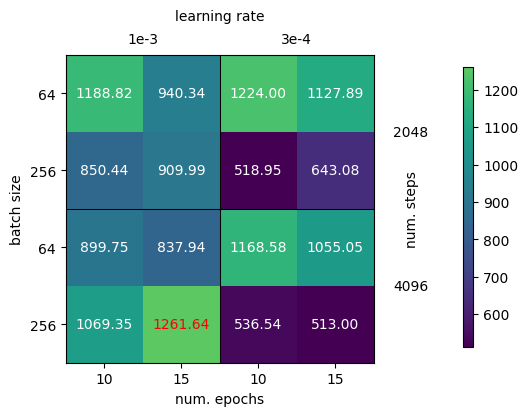

In [ ]:
heatMapGridSearch(means_array, means_array2)

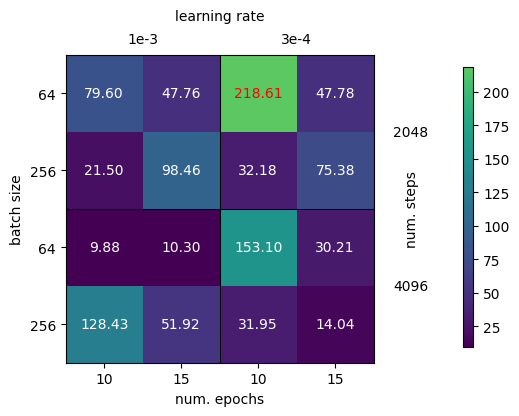

In [87]:
heatMapGridSearch(stds_array, stds_array2)

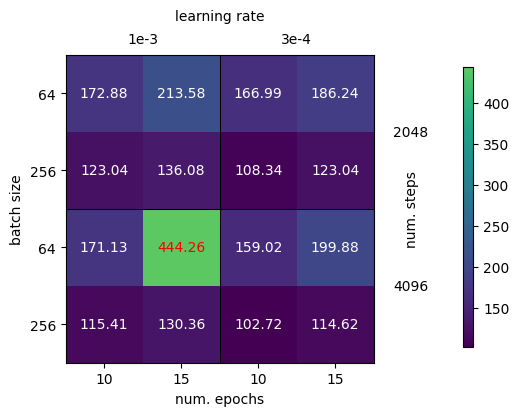

In [86]:
heatMapGridSearch(times_array, times_array2)

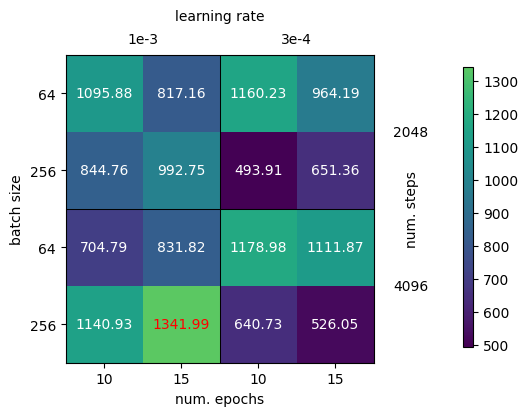

In [76]:
heatMapGridSearch(means_array2)

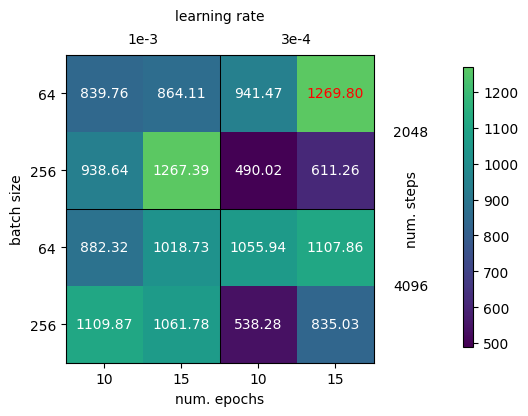

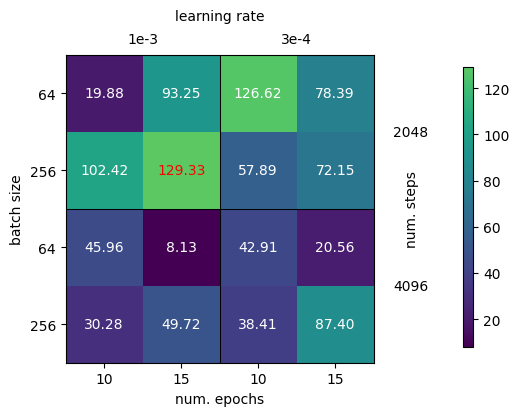

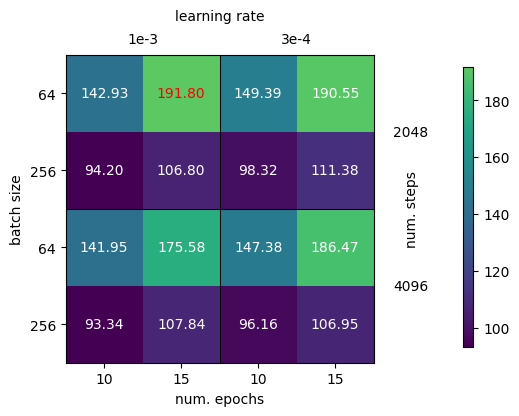

In [93]:
heatMapGridSearch(means_array_dr)
heatMapGridSearch(stds_array_dr)
heatMapGridSearch(times_array_dr)